In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [4]:
df = pd.read_csv('General_test_results1.csv')
df.head()

TestNumber  Producers  Consumers  BufferCapacity  MaxProductions  \
0           0        500       1000              10               1   
1           0        500       1000              10               1   
2           0        500       1000              10               1   
3           0        500       1000              10               1   
4           0        500       1000              10               1   

   MaxConsumptions  Operations  TimeMillis Algorithm  
0                4         500          90     2Cond  
1                4        1000          95     2Cond  
2                4        1500          94     2Cond  
3                4        2000          95     2Cond  
4                4        2500          91     2Cond

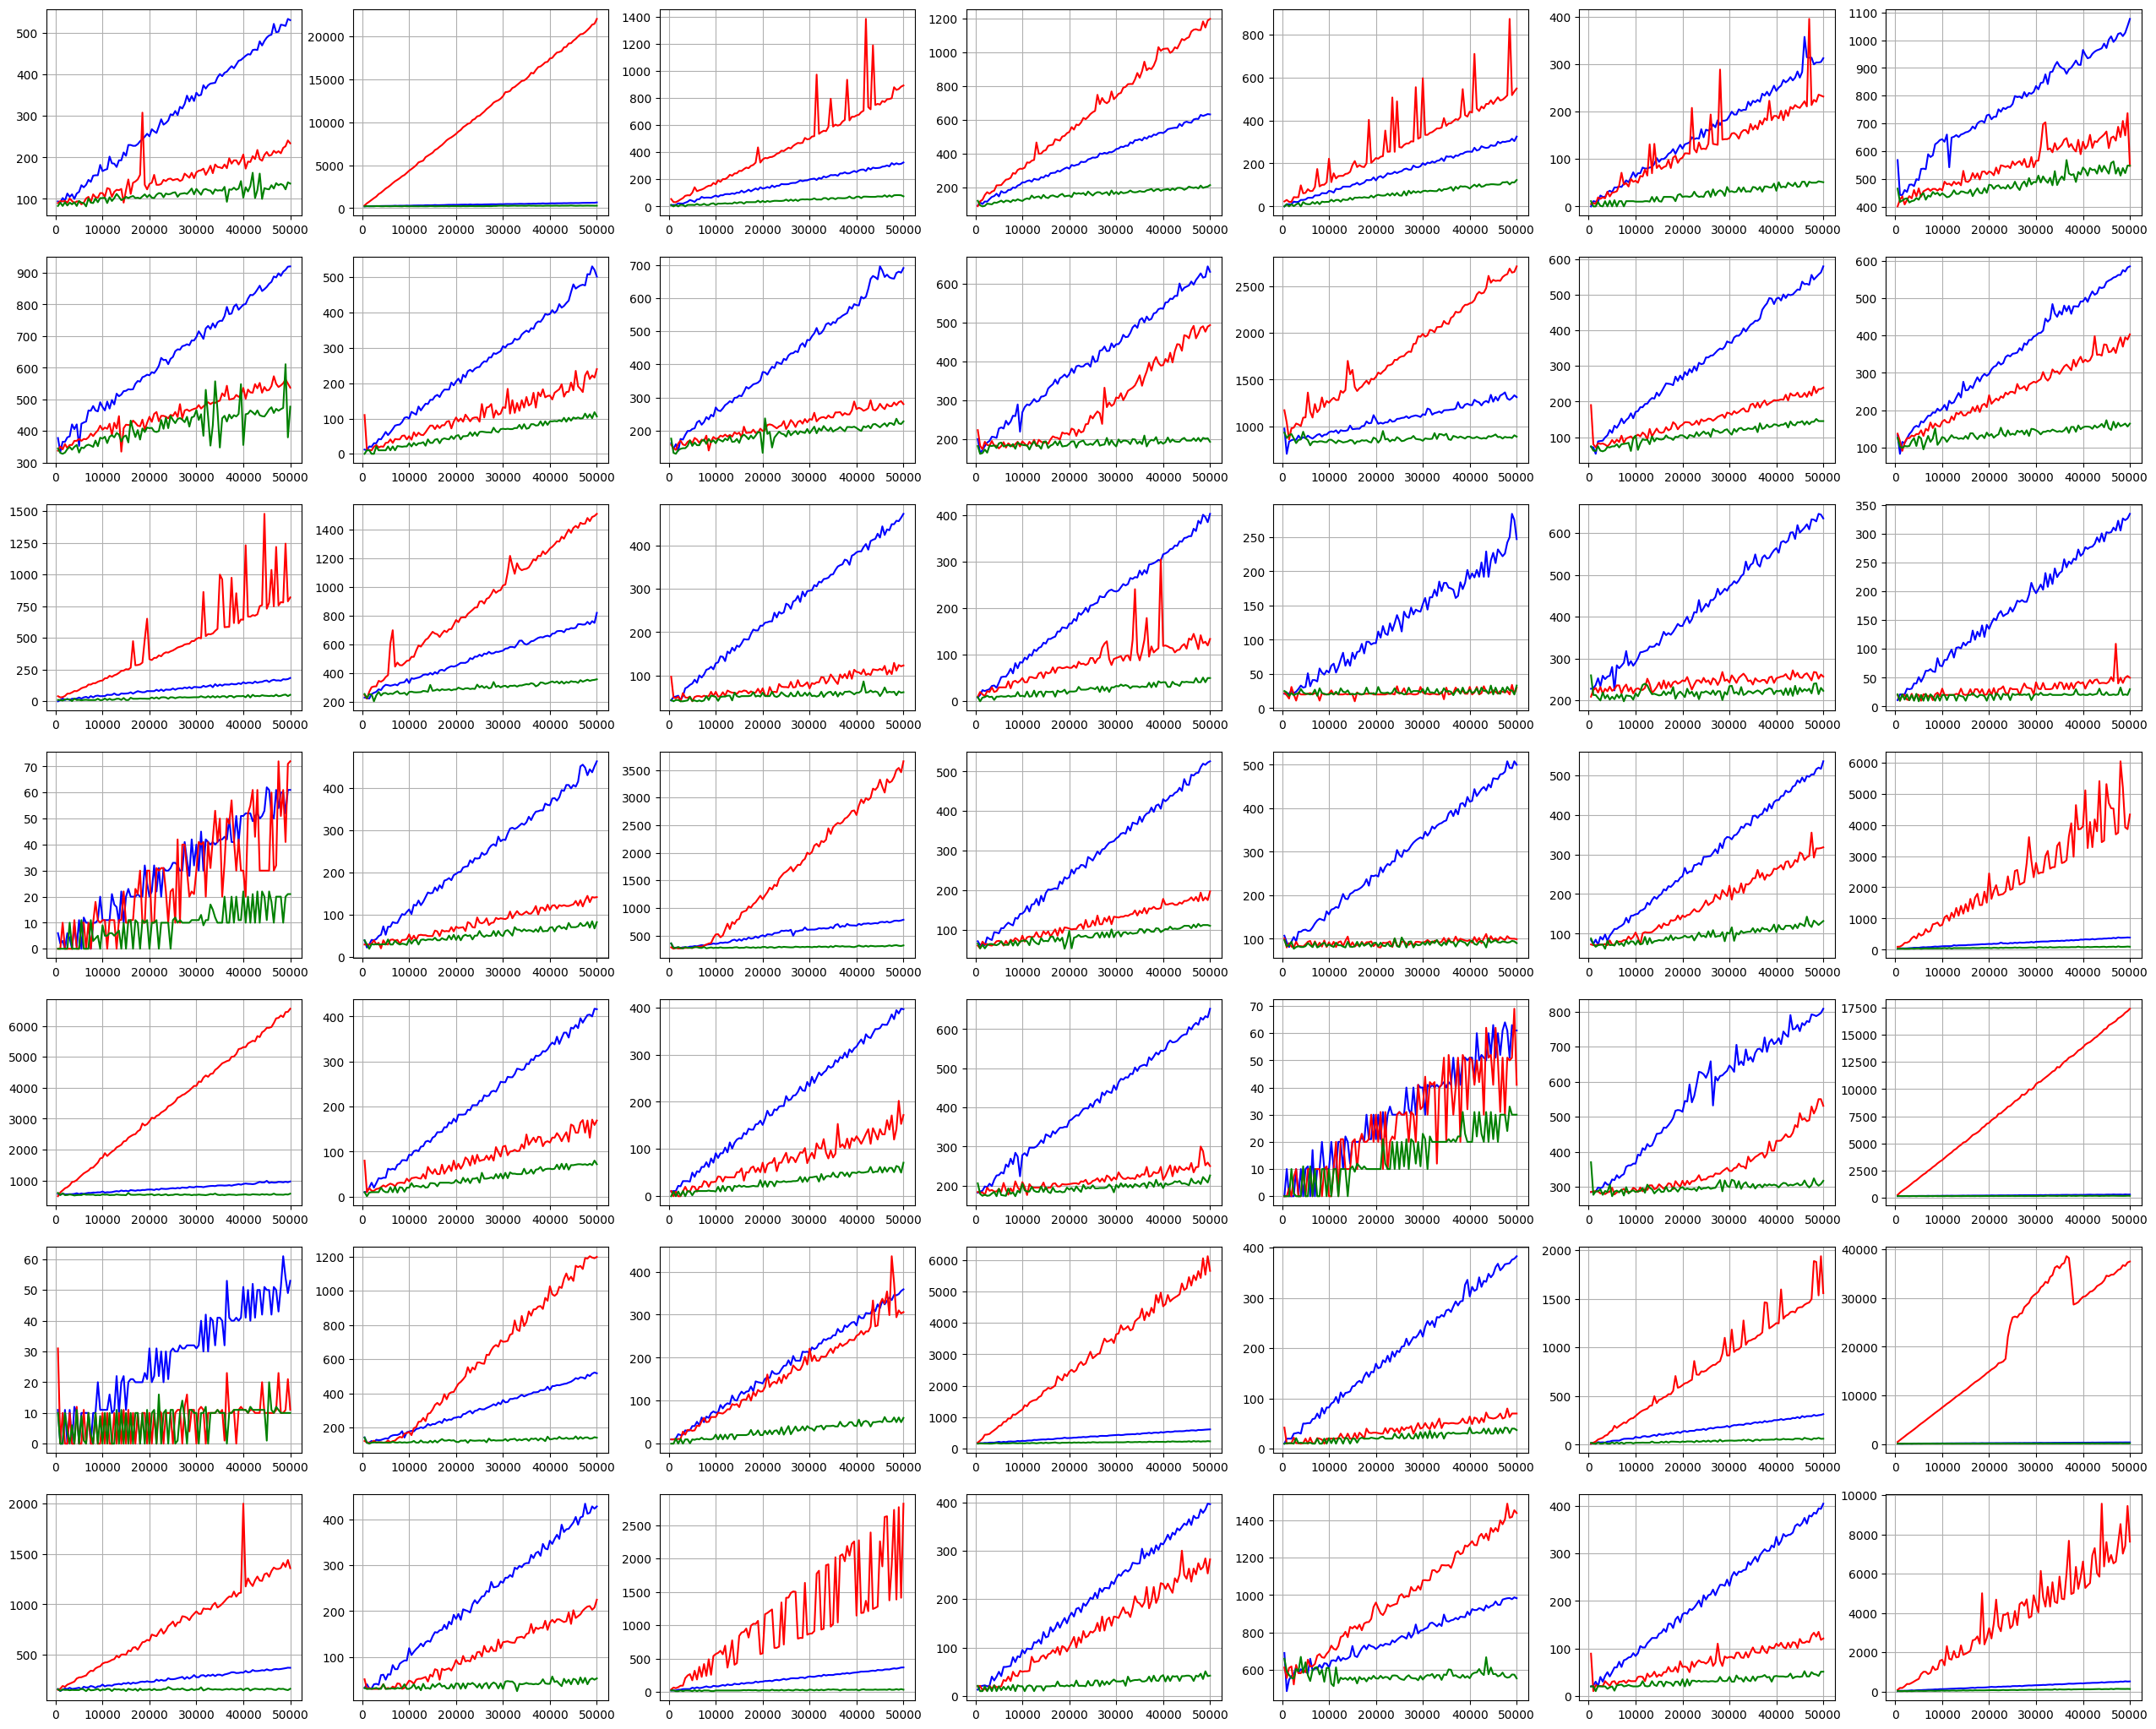

In [ ]:
fig, axs = plt.subplots(7, 7, figsize=(32, 26))

interesting = {1, 2, 4,5,6,7,10,14,18,21,27,32,33,34,35,37,41,44,45,48}

for i, ax in enumerate(axs.flat):
    test_data = df[df["TestNumber"] == i]
    test_data_2Cond = test_data[test_data["Algorithm"] == "2Cond"]
    test_data_4Cond = test_data[test_data["Algorithm"] == "4Cond"]
    test_data_3Locks = test_data[test_data["Algorithm"] == "3Locks"]

    ax.plot(test_data_4Cond["Operations"], test_data_4Cond["TimeMillis"], color='blue', label='4Cond')
    ax.plot(test_data_2Cond["Operations"], test_data_2Cond["TimeMillis"], color='red', label='2Cond')
    ax.plot(test_data_3Locks["Operations"], test_data_3Locks["TimeMillis"], color='green', label='3locks')

    # ax.set_title(f'P: {test_data_4Cond["Producers"].iloc[0]}, C: {test_data_4Cond["Consumers"].iloc[0]}, Buffer: {test_data_4Cond["BufferCapacity"].iloc[0]}')
    # ax.set_xlabel('Operations')
    # ax.set_ylabel('Time (ms)')
    ax.grid(True)
    # ax.legend()

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Performance_for_Different_Test_Configurations1.png')
plt.show()

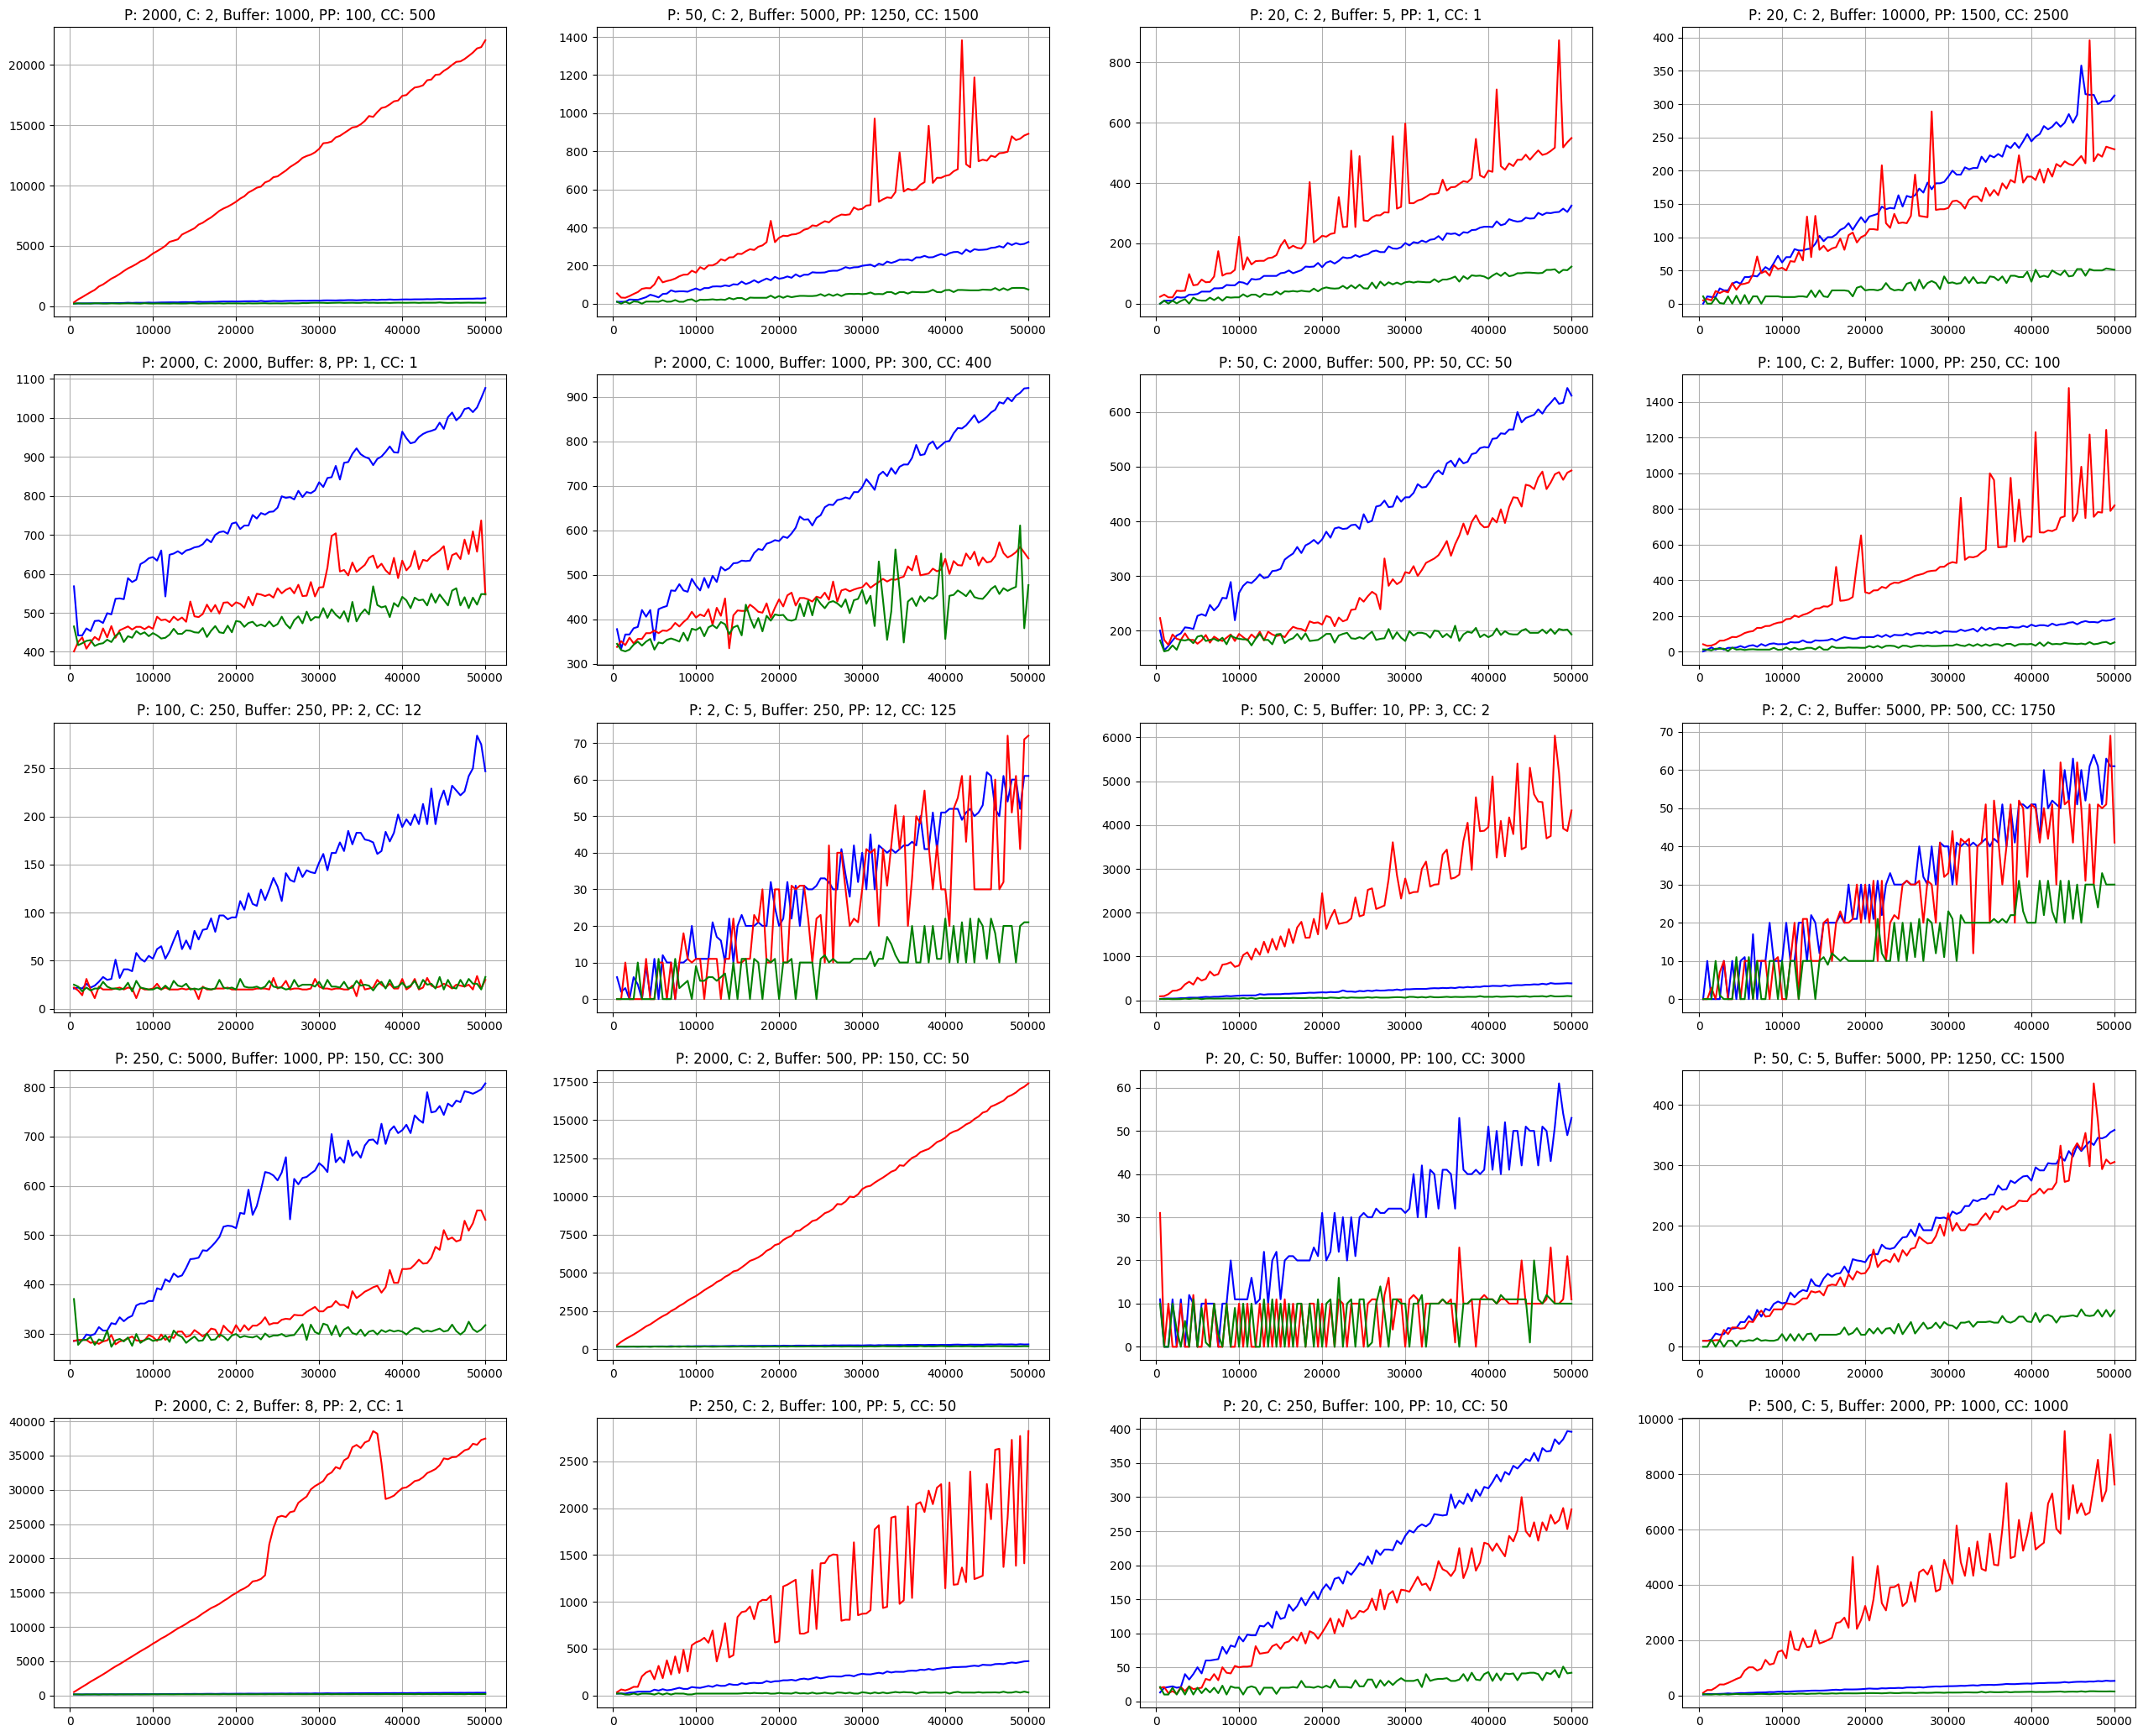

In [26]:
fig, axs = plt.subplots(5, 4, figsize=(32, 26))

interesting = [1, 2, 4,5,6,7,10,14,18,21,27,32,33,34,35,37,41,44,45,48]

for i, ax in enumerate(axs.flat):
    test_data = df[df["TestNumber"] == interesting[i]]
    test_data_2Cond = test_data[test_data["Algorithm"] == "2Cond"]
    test_data_4Cond = test_data[test_data["Algorithm"] == "4Cond"]
    test_data_3Locks = test_data[test_data["Algorithm"] == "3Locks"]

    ax.plot(test_data_4Cond["Operations"], test_data_4Cond["TimeMillis"], color='blue', label='4Cond')
    ax.plot(test_data_2Cond["Operations"], test_data_2Cond["TimeMillis"], color='red', label='2Cond')
    ax.plot(test_data_3Locks["Operations"], test_data_3Locks["TimeMillis"], color='green', label='3locks')

    ax.set_title(f'P: {test_data_4Cond["Producers"].iloc[0]}, C: {test_data_4Cond["Consumers"].iloc[0]}, Buffer: {test_data_4Cond["BufferCapacity"].iloc[0]}, PP: {test_data_4Cond["MaxProductions"].iloc[0]}, CC: {test_data_4Cond["MaxConsumptions"].iloc[0]}' )
    # ax.set_xlabel('Operations')
    # ax.set_ylabel('Time (ms)')
    ax.grid(True)
    # ax.legend()

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Performance_for_Different_Test_Configurations1.png')
plt.show()

In [27]:
df2 = pd.read_csv("Detailed_test1.csv")

In [50]:
def plot_tests(df, title=None, saveBool=True):  
    plots_num = max(df["TestNumber"]) + 1
    plots_cols = int(sqrt(plots_num))
    while plots_num % plots_cols != 0:
        plots_cols -= 1
    plots_rows = plots_num // plots_cols

    fig, axs = plt.subplots(plots_rows, plots_cols, figsize=(14, 12))
    fig.suptitle("Performance for Different Test Configurations", fontsize="14")

    for i, ax in enumerate(axs.flat):
        test_data = df[df["TestNumber"] == i]
        test_data_2Cond = test_data[test_data["Algorithm"] == "2Cond"]
        test_data_4Cond = test_data[test_data["Algorithm"] == "4Cond"]
        test_data_3Locks = test_data[test_data["Algorithm"] == "3Locks"]

        ax.plot(test_data_4Cond["Operations"], test_data_4Cond["TimeMillis"], color='blue', label='4Cond')
        ax.plot(test_data_2Cond["Operations"], test_data_2Cond["TimeMillis"], color='red', label='2Cond')
        ax.plot(test_data_3Locks["Operations"], test_data_3Locks["TimeMillis"], color='green', label='3locks')

        ax.set_title(f'P: {test_data_4Cond["Producers"].iloc[0]}, C: {test_data_4Cond["Consumers"].iloc[0]}, Buffer: {test_data_4Cond["BufferCapacity"].iloc[0]}, maxP: {test_data_4Cond["MaxProductions"].iloc[0]}, maxC: {test_data_4Cond["MaxConsumptions"].iloc[0]}' )
        ax.set_xlabel('Operations')
        ax.set_ylabel('Time (ms)')
        ax.grid(True)
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 1])
    if title is not None and saveBool:
        plt.savefig(f'{title}.png')
    plt.show()



In [40]:
from matplotlib.ticker import MaxNLocator

In [55]:
def plot_ops(df, title=None, ):
    plots_num = (max(df["TestNumber"]) + 1)
    plots_cols = int(sqrt(plots_num))
    while plots_num % plots_cols != 0:
        plots_cols -= 1
    plots_rows = plots_num // plots_cols

    plots_cols = 3
    plots_rows = 2

    fig, axs = plt.subplots(plots_rows, plots_cols, figsize=(20, 12))
    fig.suptitle(f'Thread Participation for Different Test Configurations\n (Operations: {df["Operations"].iloc[0]})', fontsize="20")

    for i, ax in enumerate(axs.flat):

        test_data = df[df["TestNumber"] == i]

        ax.bar(test_data["ID"], test_data["ThreadOperations"], color=['red' if x == 'P' else 'blue' for x in test_data["Type"]])
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        ax.set_xlabel('Thread Index', fontsize="12")
        ax.set_ylabel('Thread Operations', fontsize="12")
        ax.set_title(f'{test_data["Algorithm"].iloc[0]}\n P: {test_data["Producers"].iloc[0]}, C: {test_data["Consumers"].iloc[0]}, Buffer: {test_data["BufferCapacity"].iloc[0]}, maxP: {test_data["MaxProductions"].iloc[0]}, maxC: {test_data["MaxConsumptions"].iloc[0]}', fontsize="18" )
        
        # ax.set_xticks(test_data.index, test_data["Type"] + test_data.index.astype(str), rotation=90)

    plt.tight_layout(rect=[0, 0, 1, 1])
    if title is not None:
        plt.savefig(f'{title}.png')
    plt.show()       

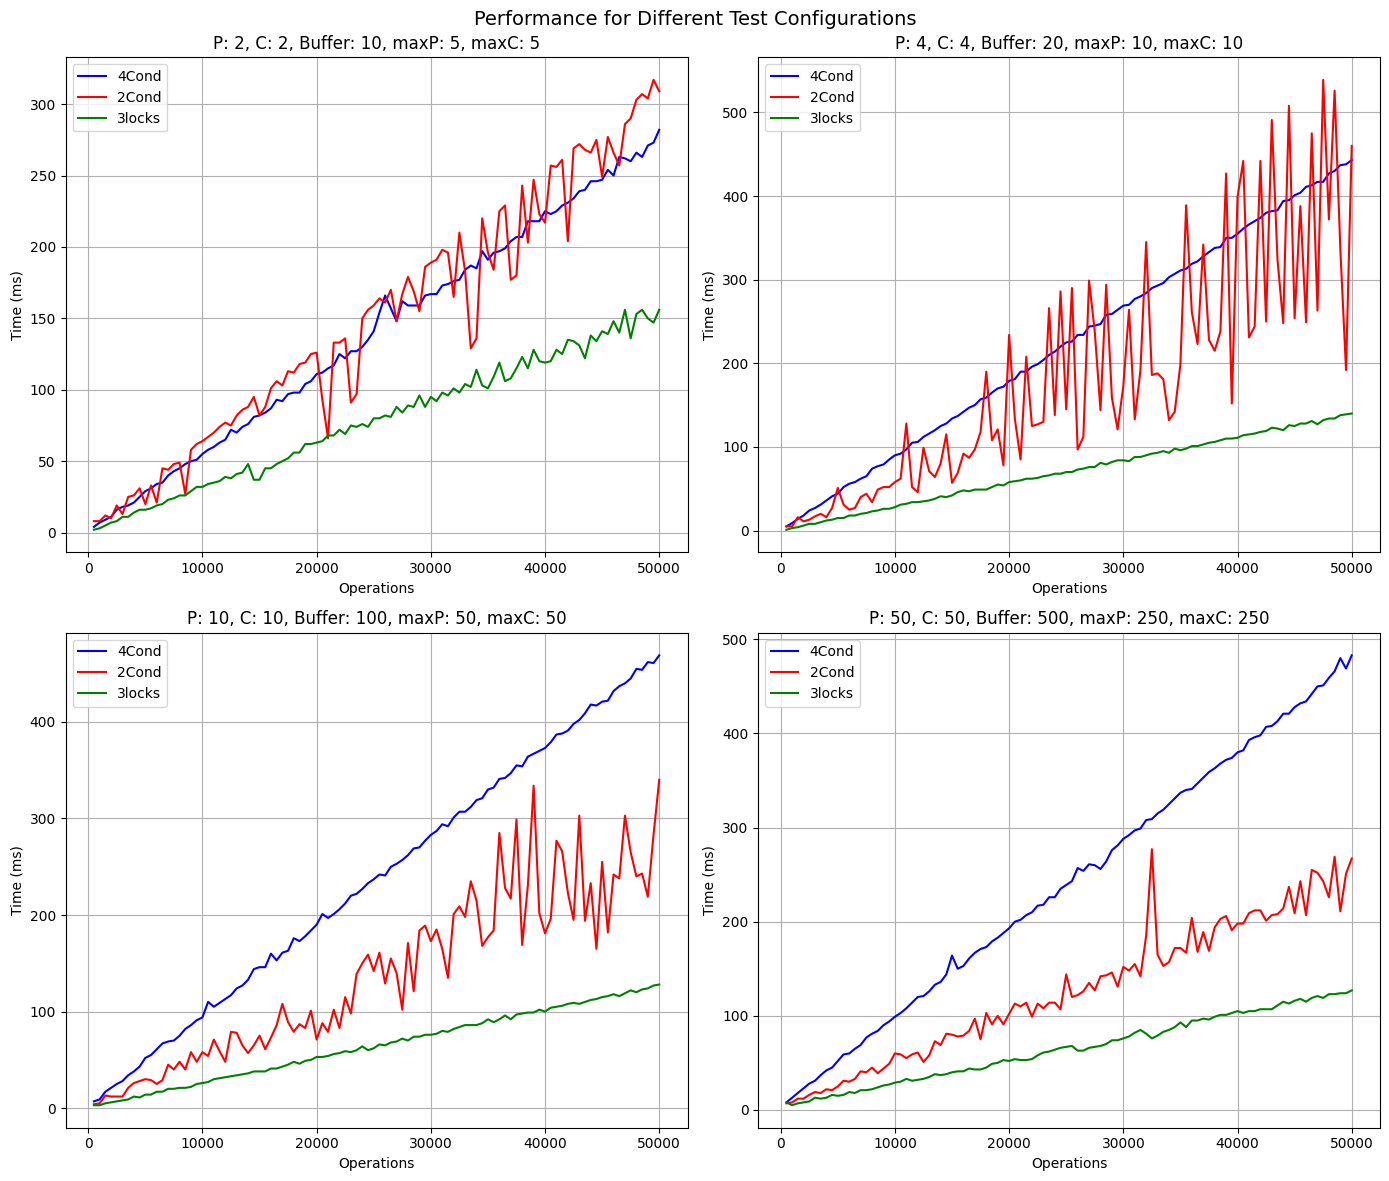

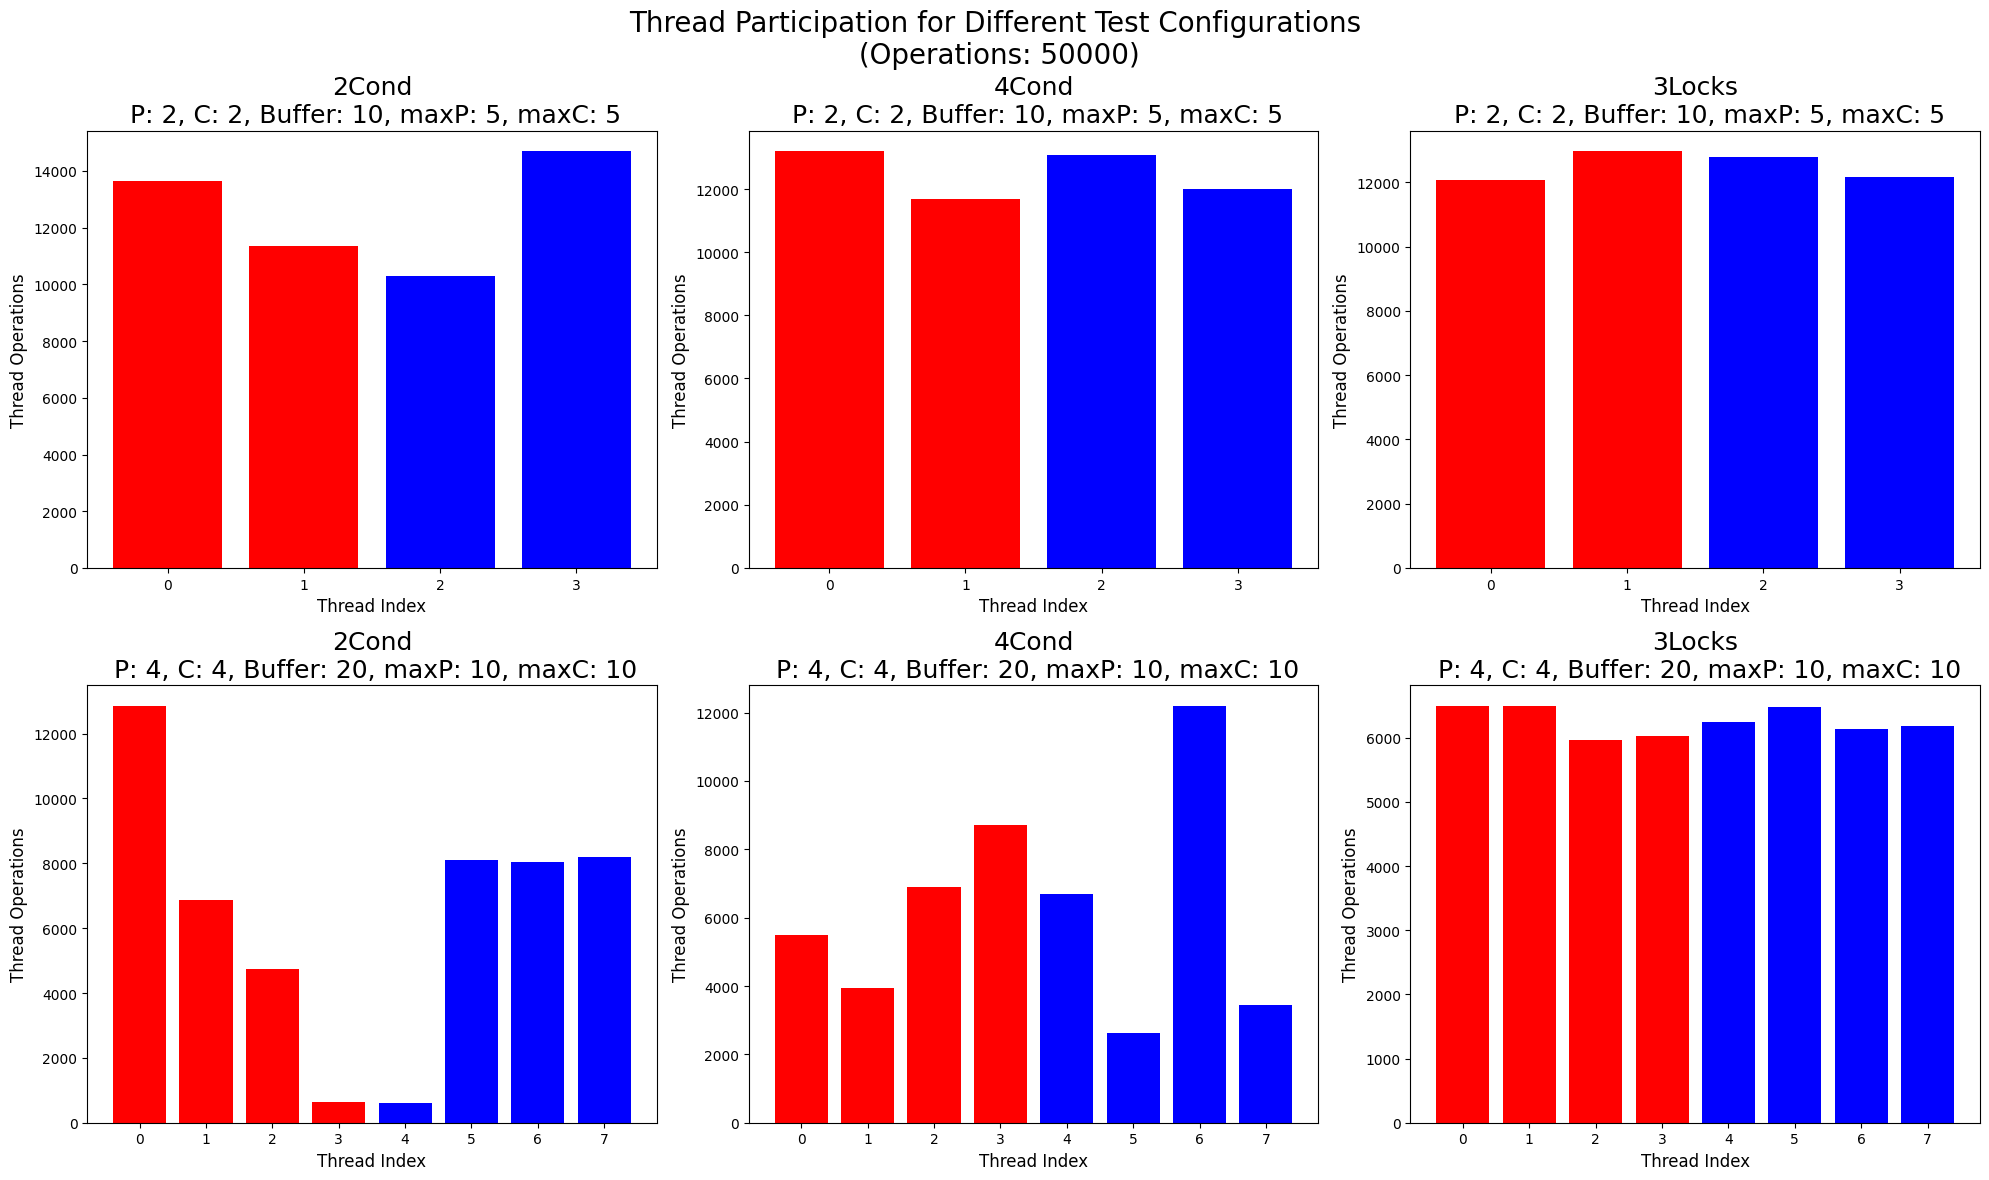

In [57]:
eks1_1 = pd.read_csv("Eksperyment1.1.csv")
eks1_2 = pd.read_csv("Eksperyment1.2.csv")
plot_tests(eks1_1)
plot_ops(eks1_2)

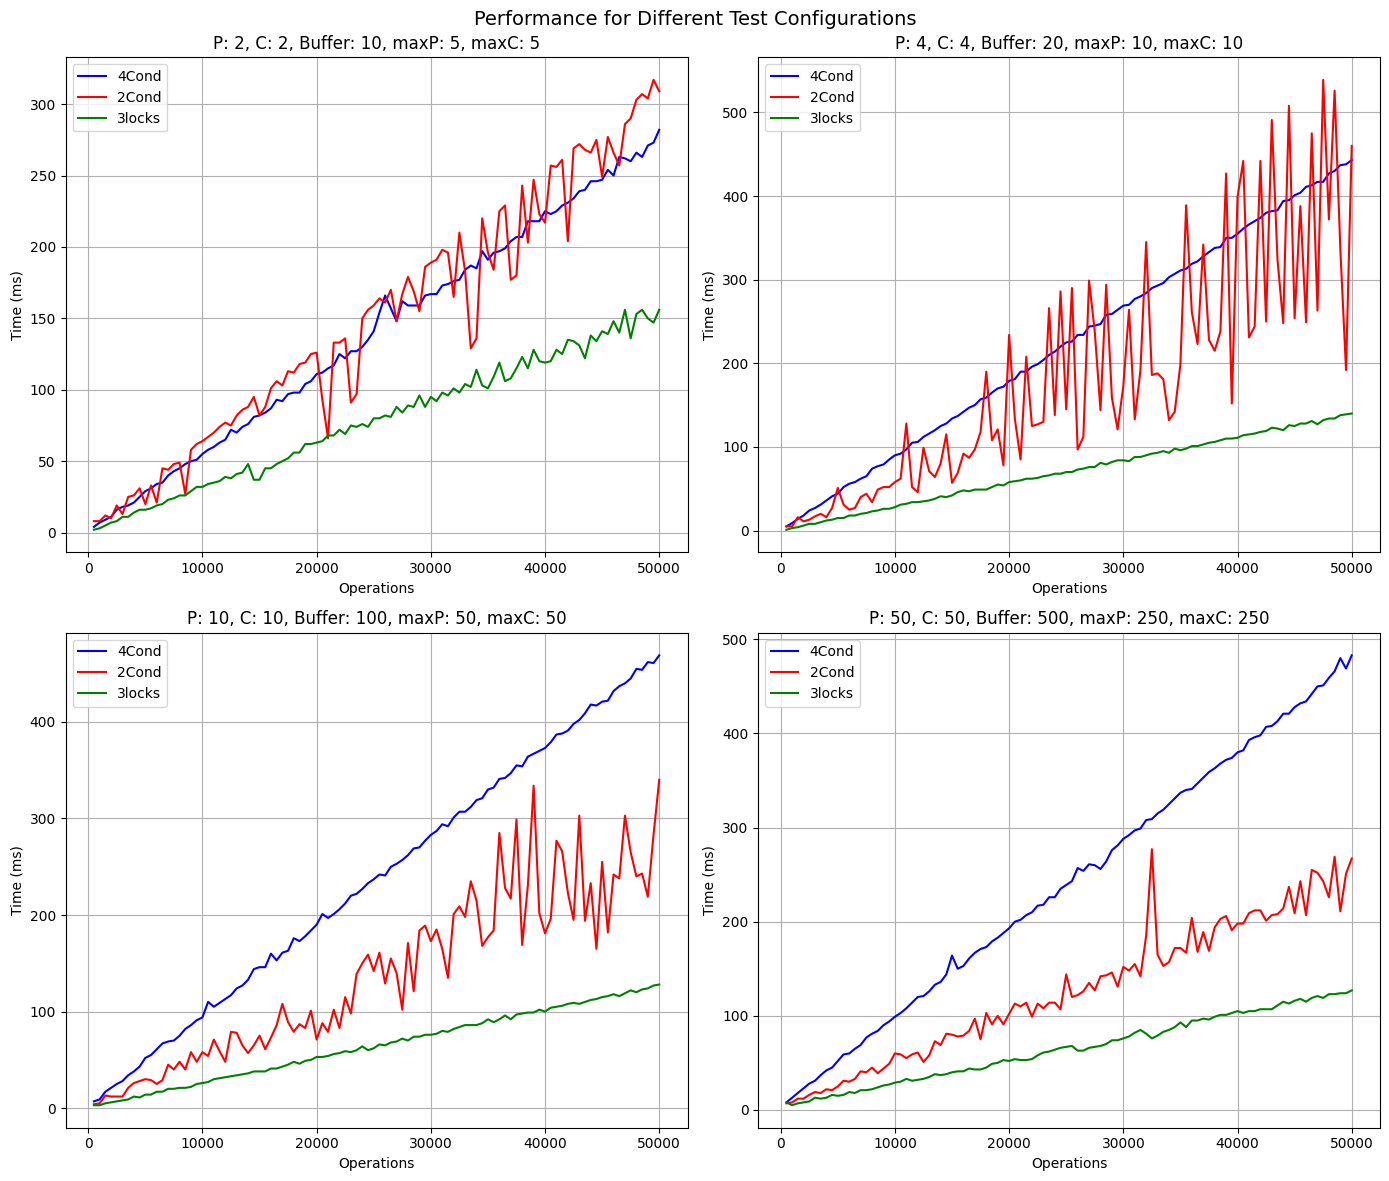

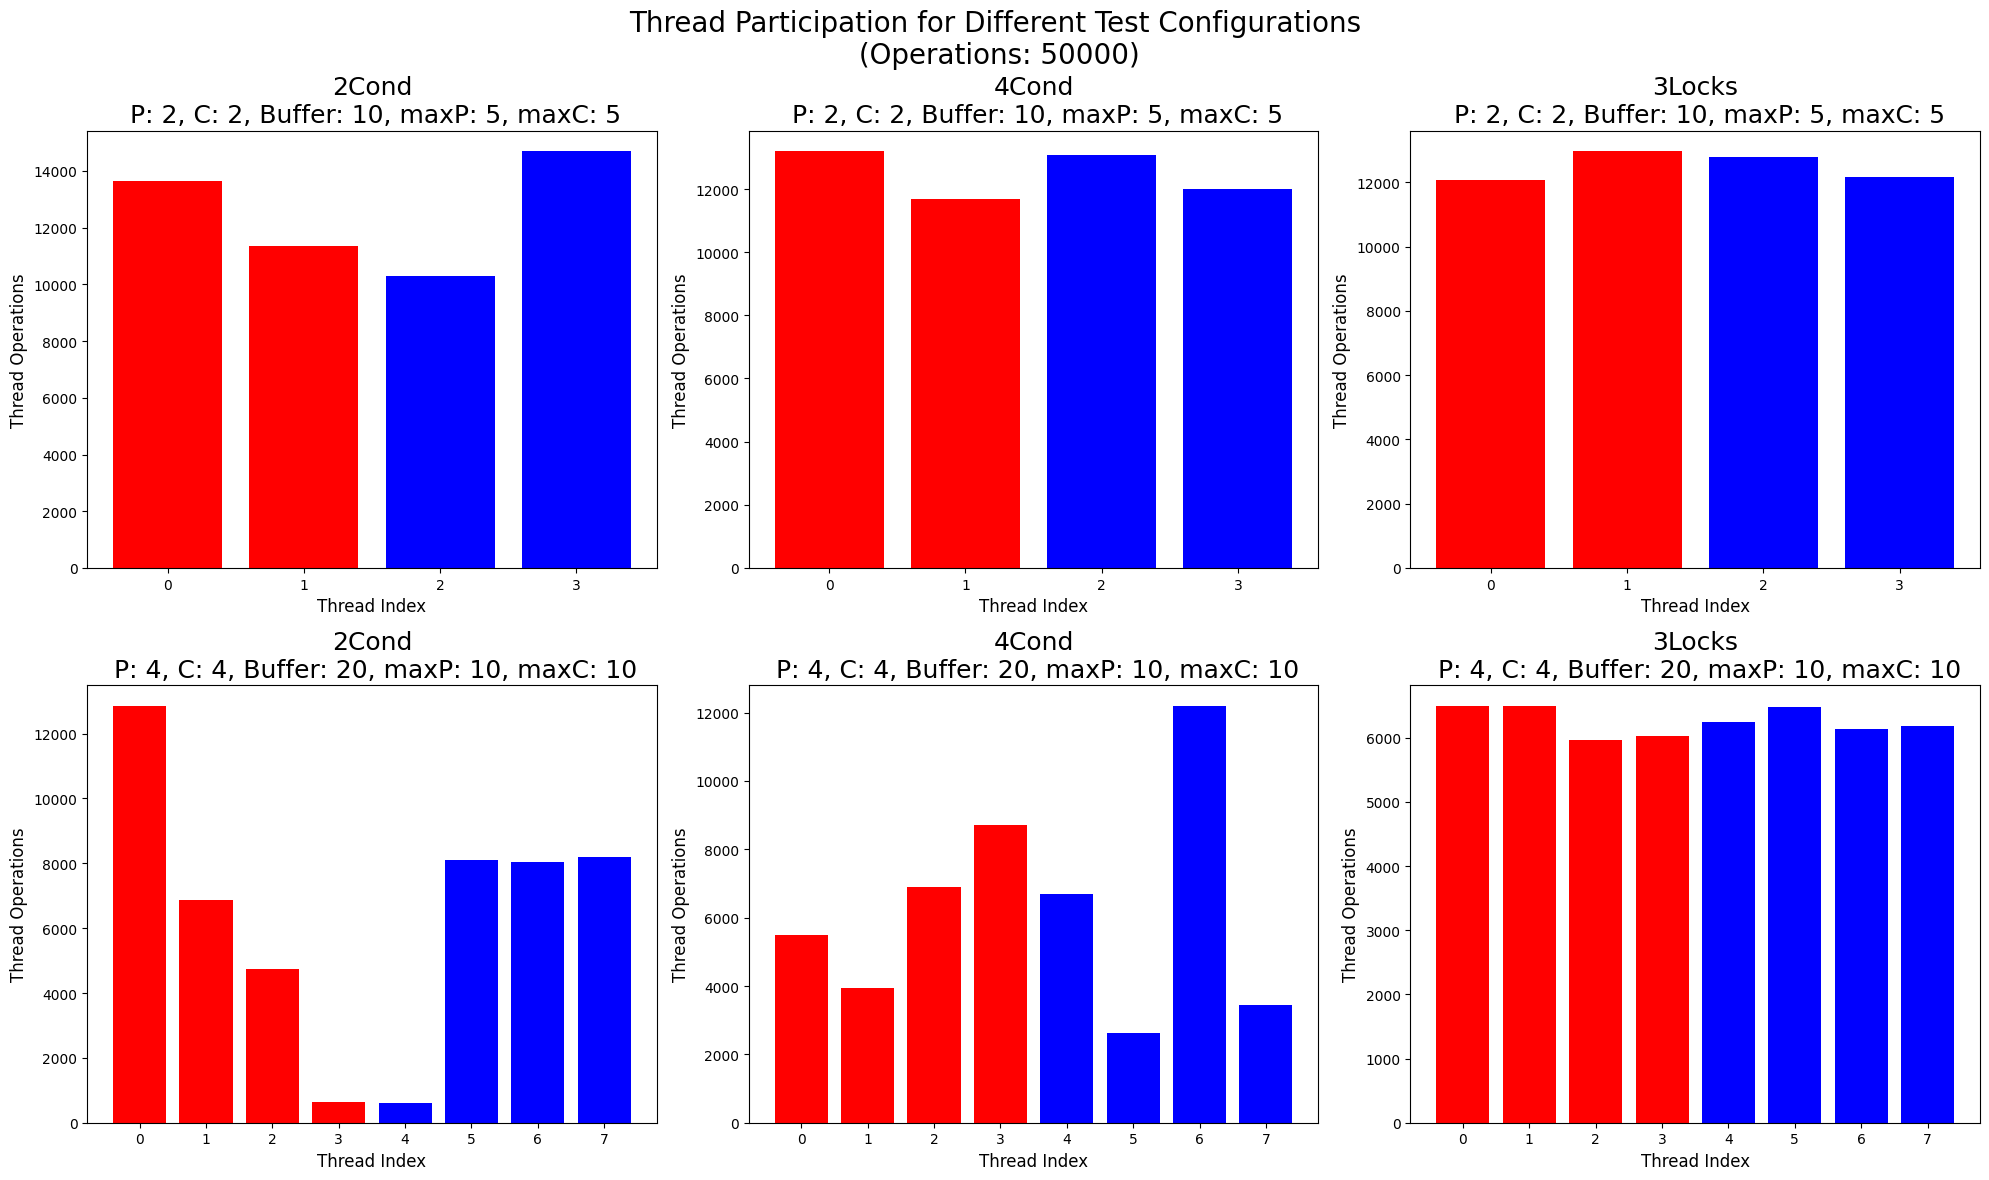

In [58]:
eks1_1 = pd.read_csv("Eksperyment1.1.csv")
eks1_2 = pd.read_csv("Eksperyment1.2.csv")
plot_tests(eks1_1, "Eksperyment1_1")
plot_ops(eks1_2, "Eksperyment1_2")

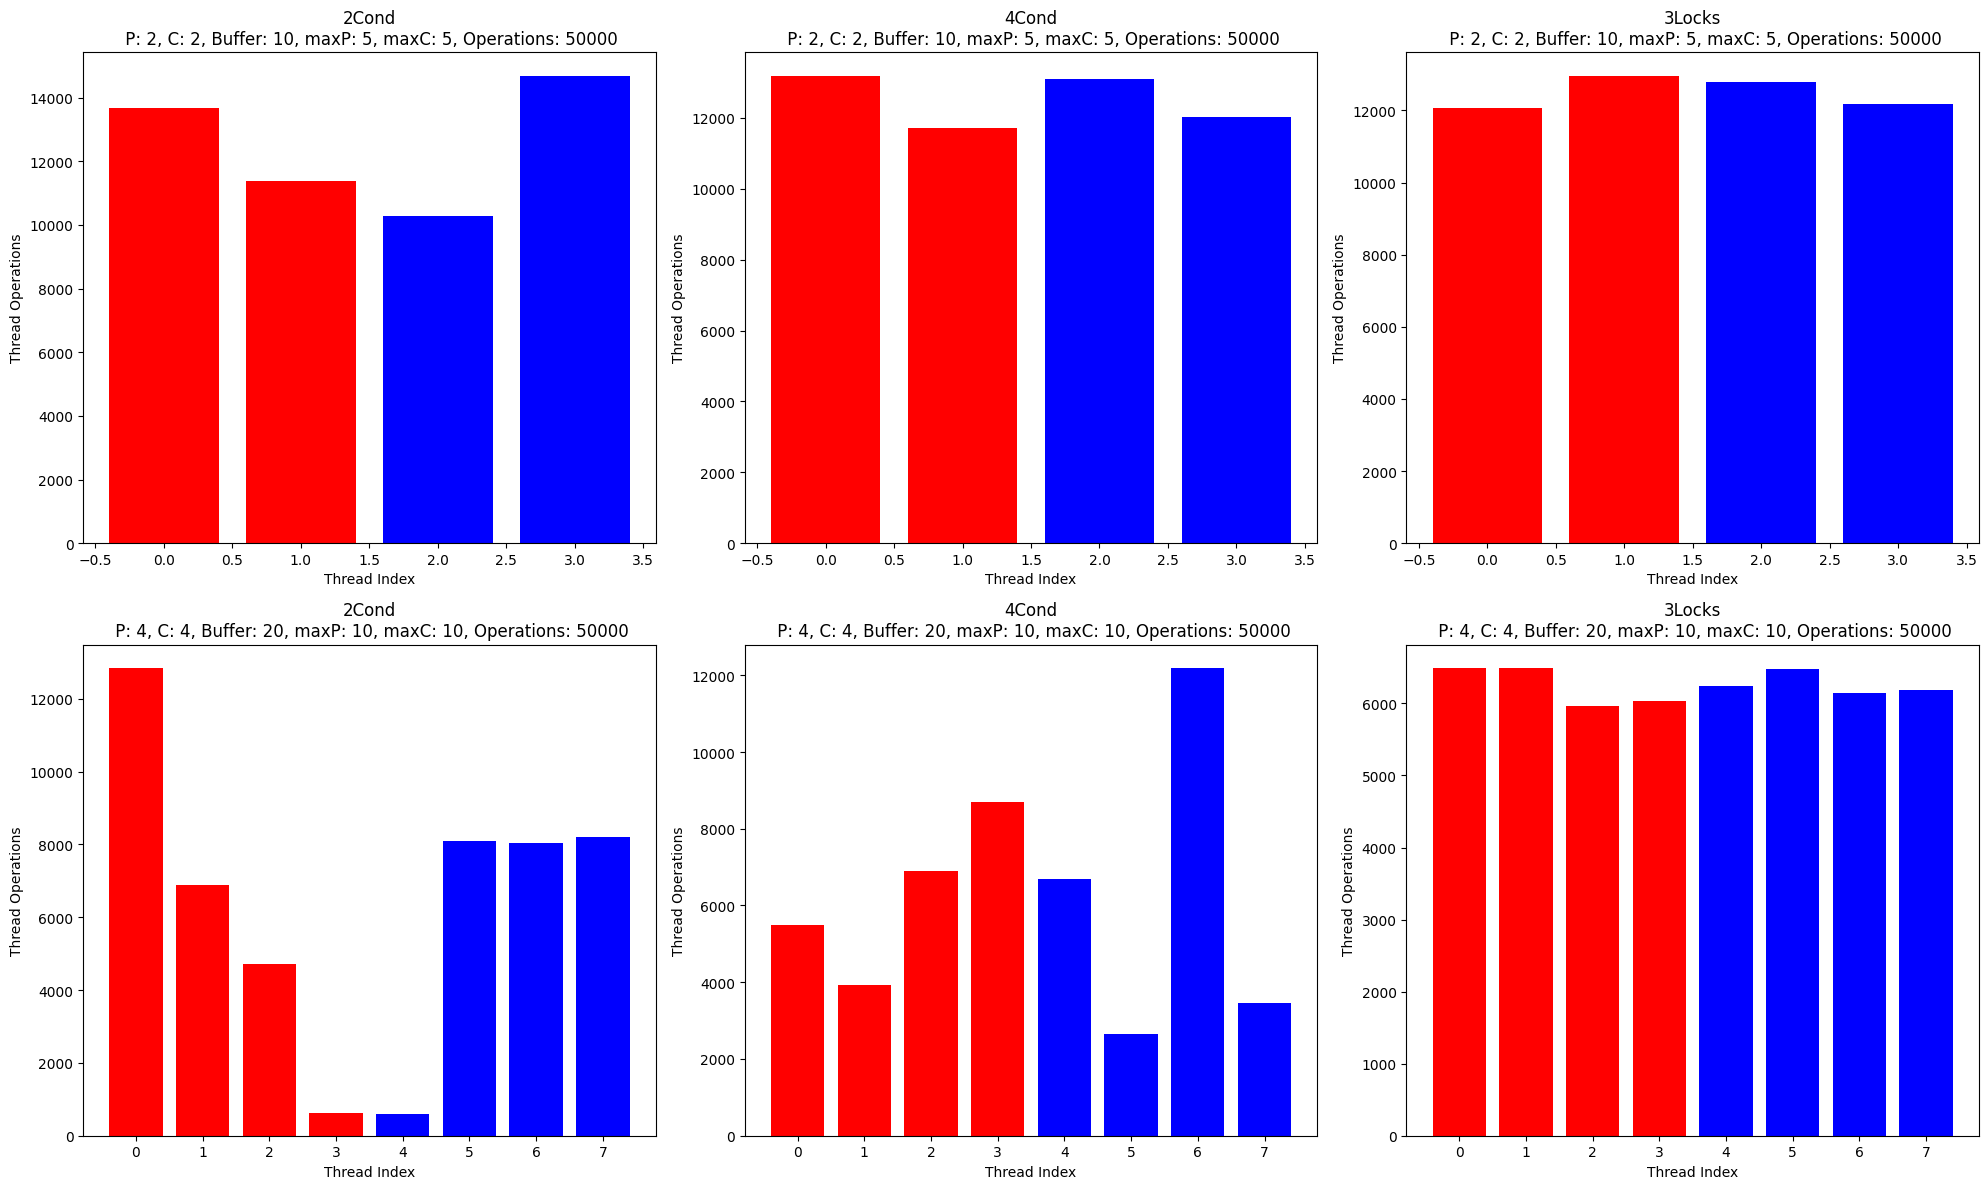

In [94]:
df7 = pd.read_csv("Eksperyment1.2.csv")
plot_ops(df7)

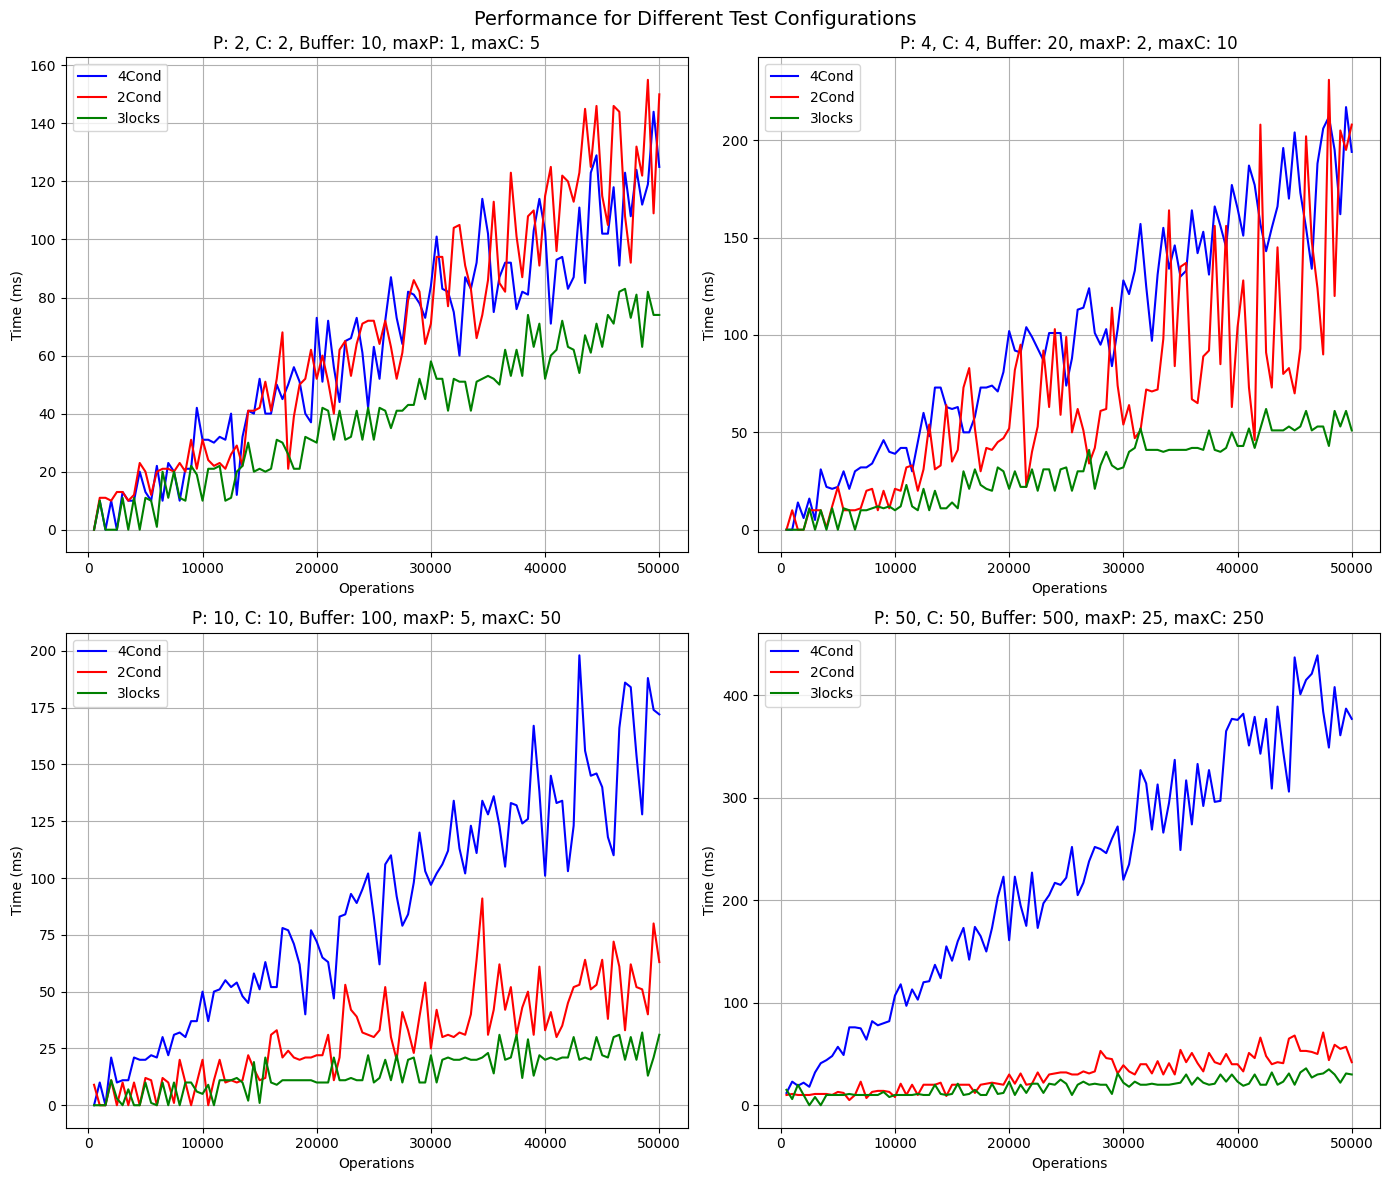

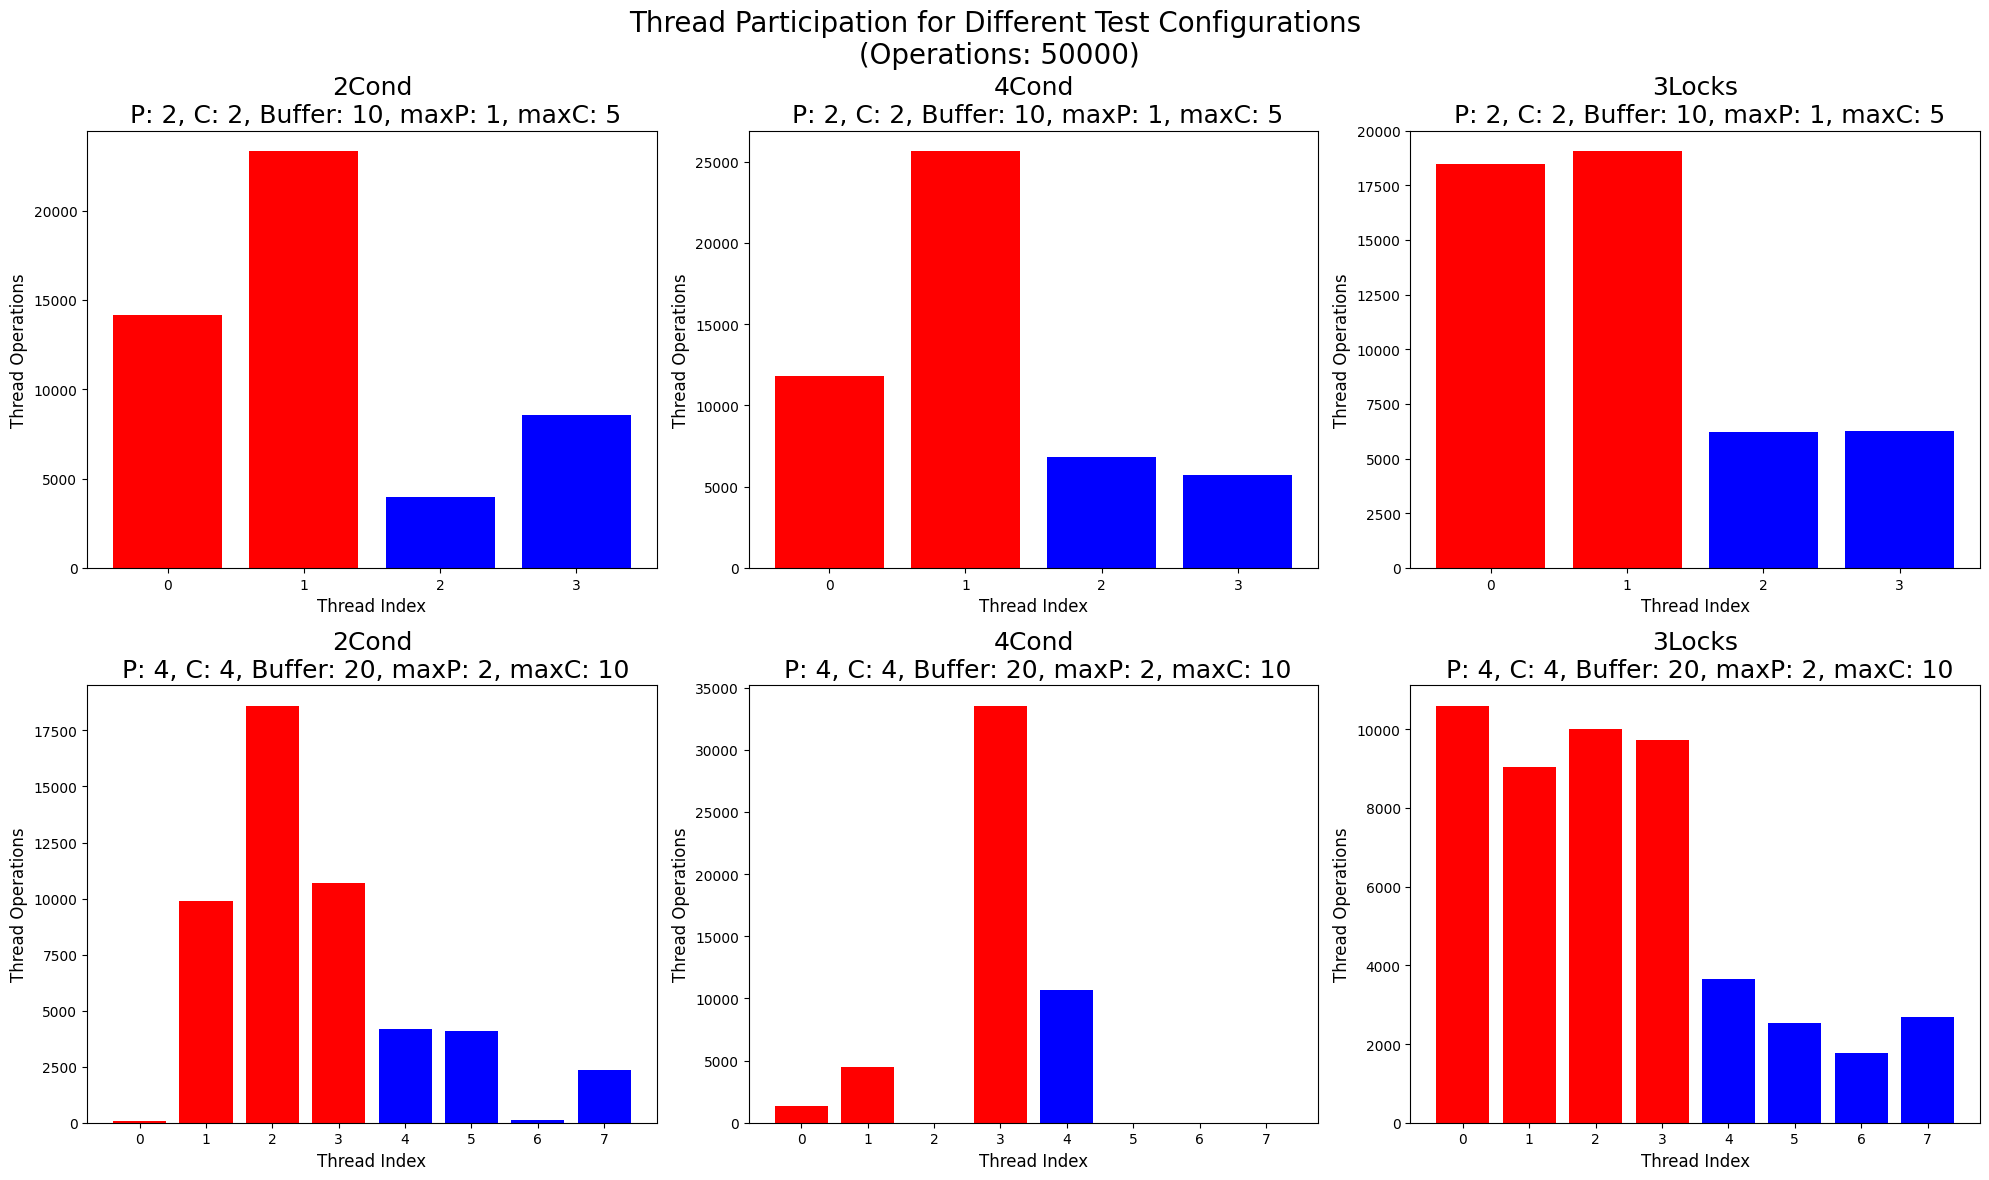

In [59]:
eks2_1 = pd.read_csv("Eksperyment2.1.csv")
eks2_2 = pd.read_csv("Eksperyment2.2.csv")
plot_tests(eks2_1, "Eksperyment2_1")
plot_ops(eks2_2, "Eksperyment2_2")

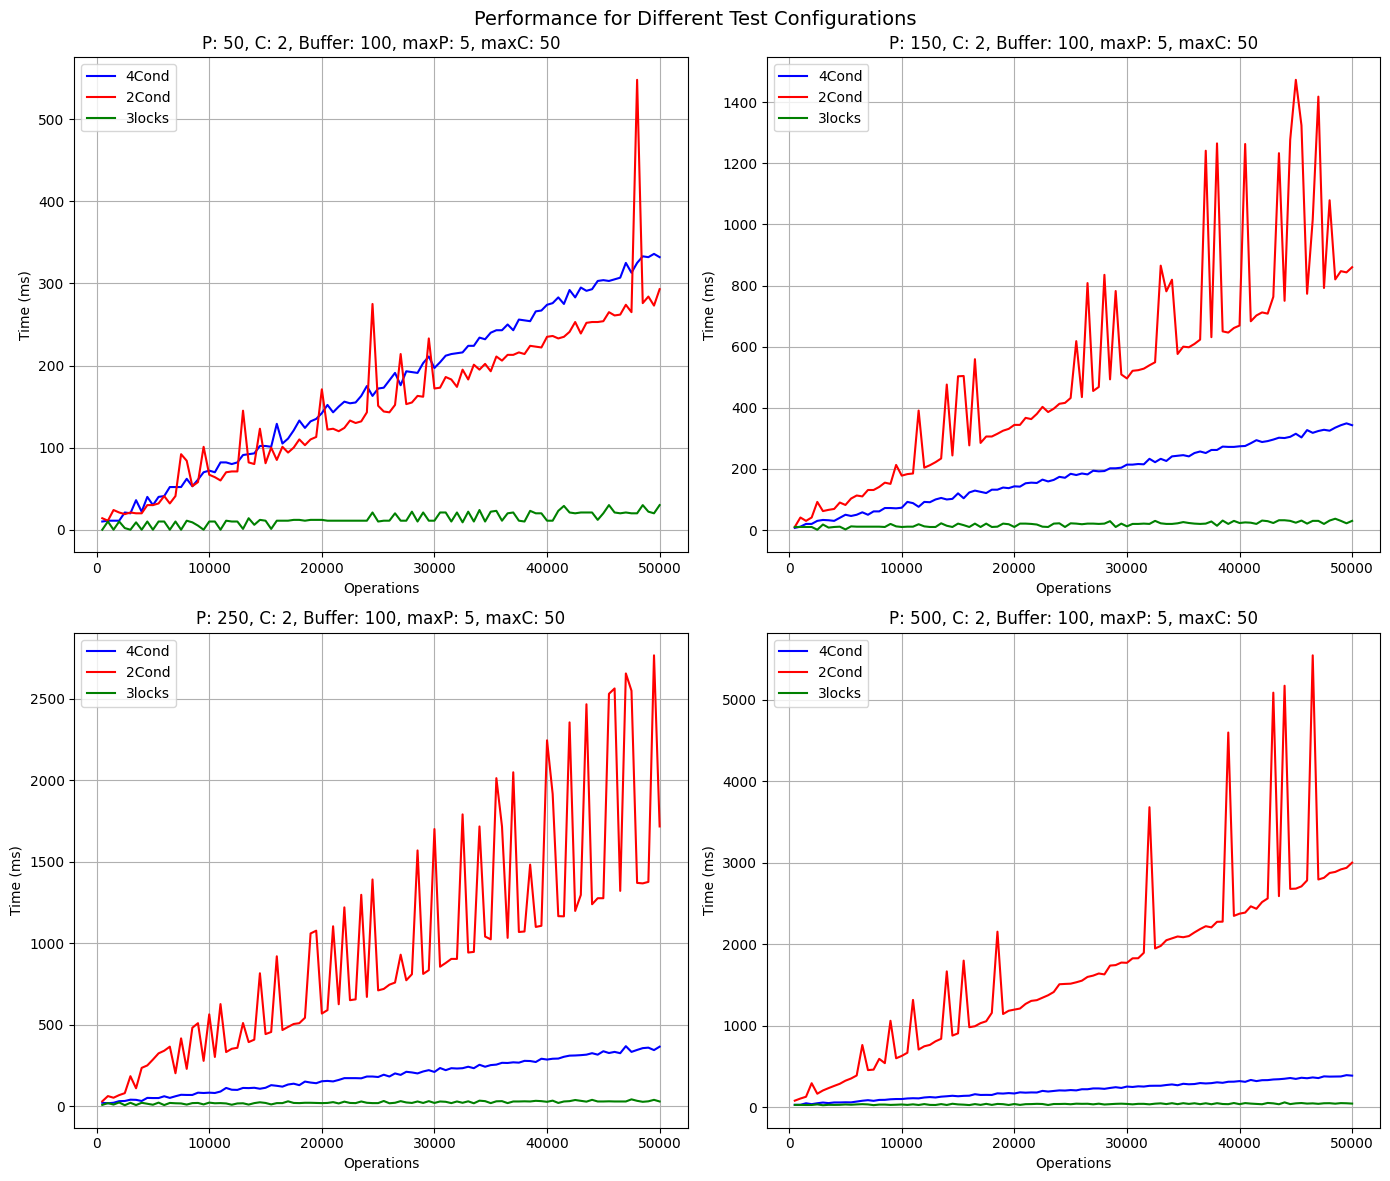

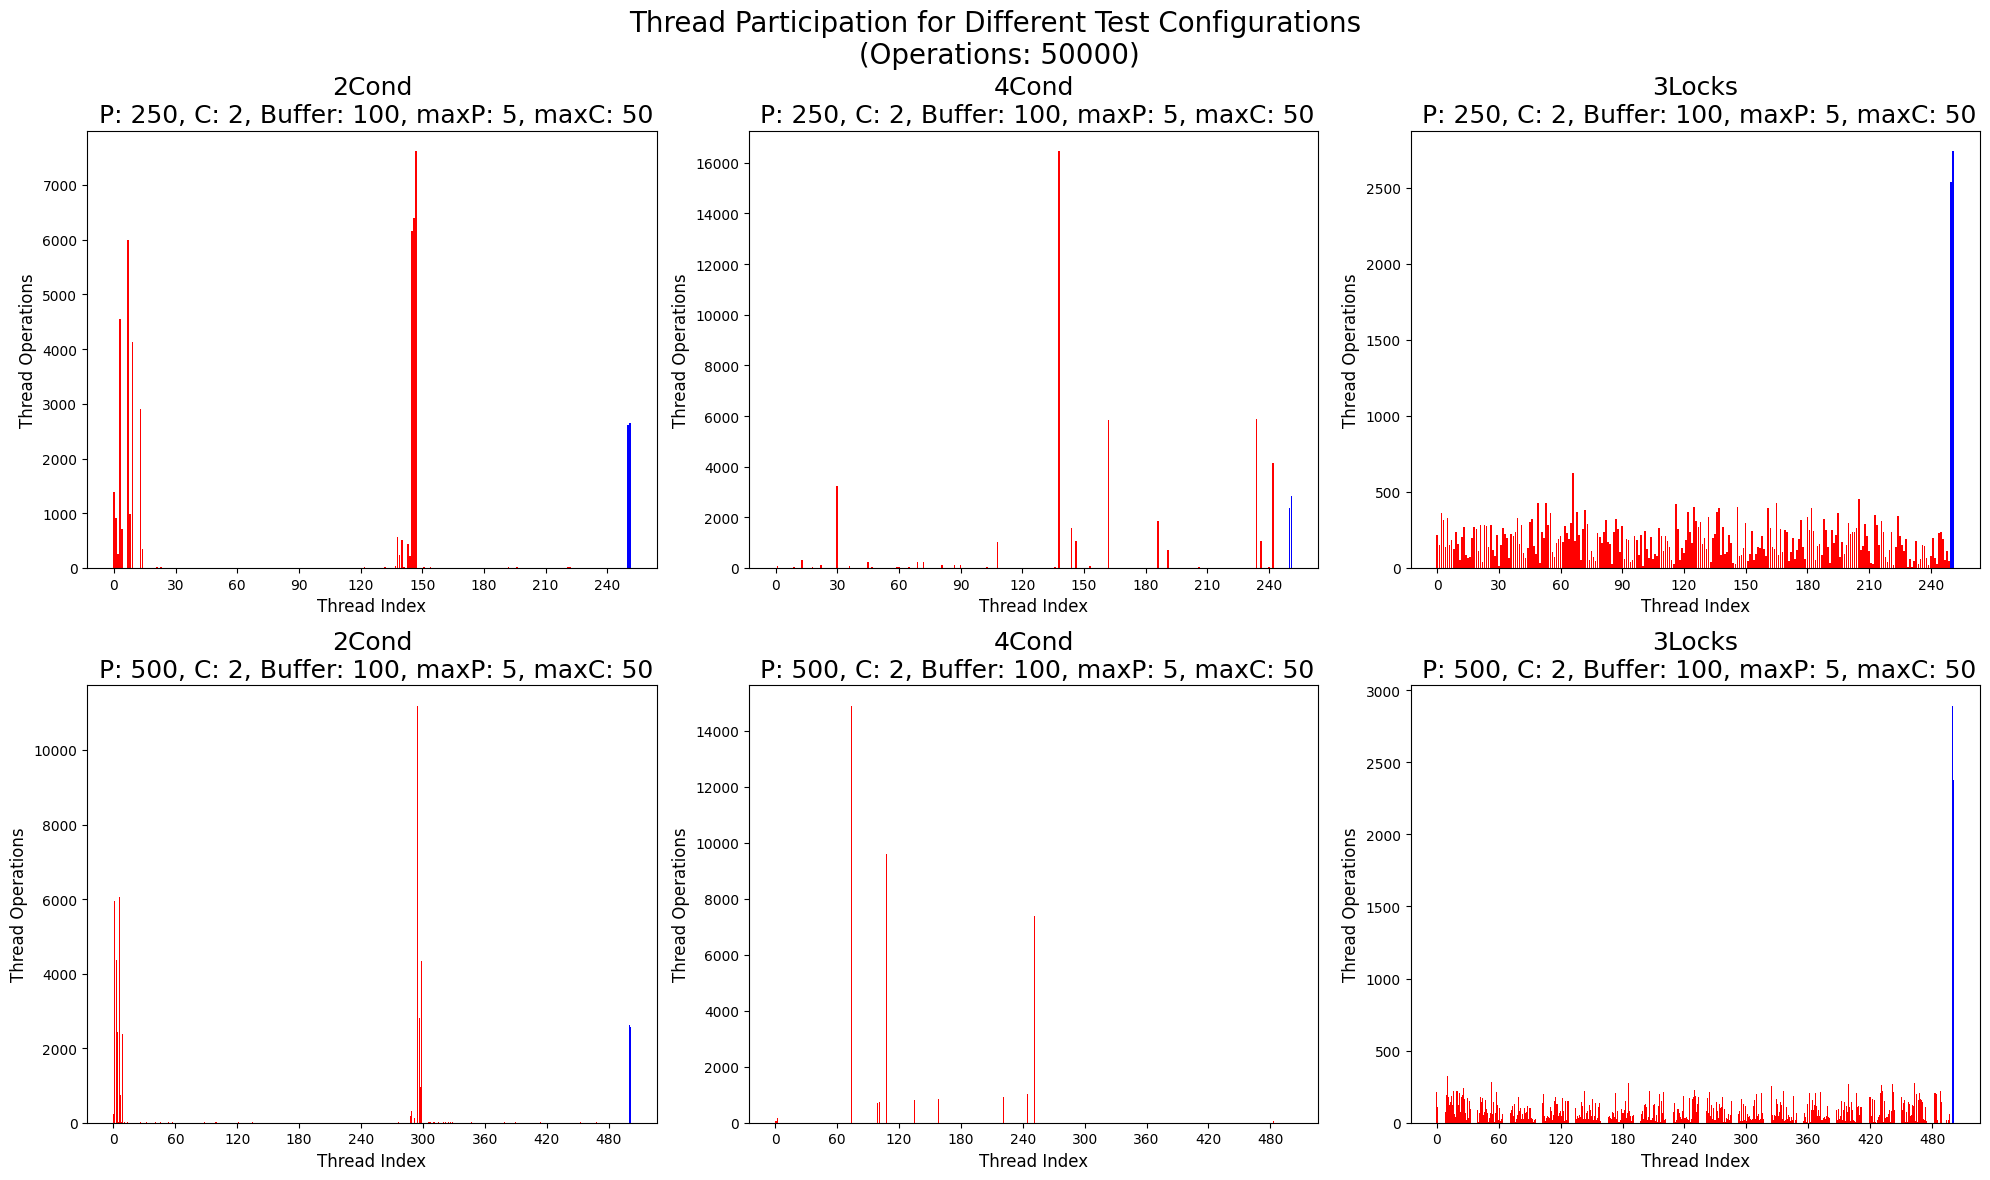

In [60]:
eks1_1 = pd.read_csv("Eksperyment3.1.csv")
eks1_2 = pd.read_csv("Eksperyment3.2.csv")
plot_tests(eks1_1, "Eksperyment3_1")
plot_ops(eks1_2, "Eksperyment3_2")